### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\joewa\.virtualenvs\simulator-g4ninw5e\lib\site-packages\sklearn\base.py:253: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
chromatograms = ChromatogramCreator(xcms_output)

0


../codes\VMSfunctions\Common.py:50: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000


### Generate some chemicals

In [8]:
chemicals = ChemicalCreator(ps, chromatograms)

In [9]:
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
sampled_chemicals = chemicals.sample(min_rt, max_rt, min_ms1_intensity, 1000, 2, 'Unknown', 'Empirical', None, False)

UnknownChemical mz=132.7802 rt=591.36 max_intensity=259161.84
[1657747.125  1872793.375  1990259.5    2800458.5    3152686.
 4076445.     3500732.5    3409161.5    2913354.75   1883536.875
 1235205.875  1038561.6875]


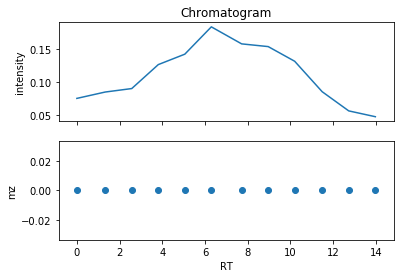

UnknownChemical mz=99.0489 rt=377.17 max_intensity=5005559.09
[134195.640625   244582.28125    597803.375      668996.875
 371090.6875     456179.75       349049.3125     259680.78125
  60065.37109375  27834.1328125 ]


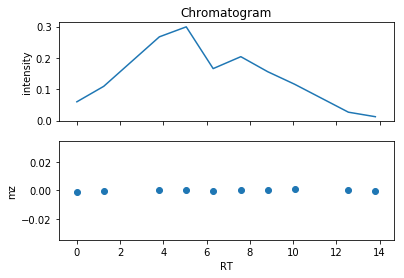

UnknownChemical mz=281.9002 rt=1241.87 max_intensity=435520.31
[12298.74316406 13383.18261719 12009.32128906 31580.16992188
 22587.7578125  11538.81738281]


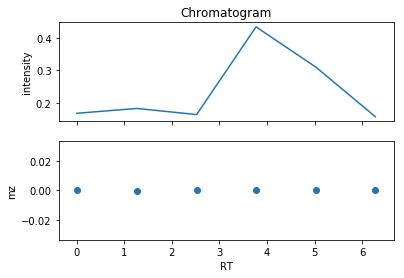

UnknownChemical mz=111.9010 rt=951.77 max_intensity=2489229.35
[ 22077.984375    26463.77734375  80497.1328125  104033.
  93713.3671875   97696.28125    129354.609375  ]


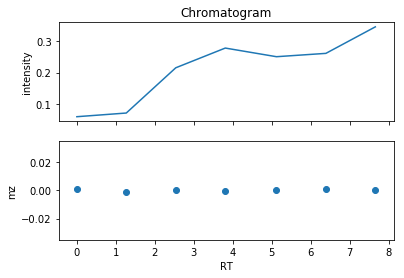

UnknownChemical mz=127.8470 rt=888.99 max_intensity=1215523.17
[ 36275.65625    148724.5625     178257.484375   218847.40625
 184942.421875   103558.3984375   21647.70703125]


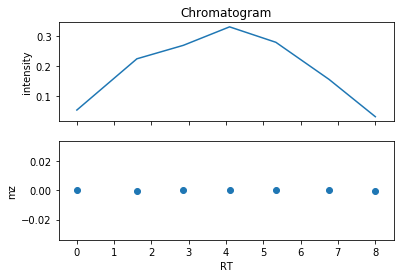

UnknownChemical mz=298.3510 rt=283.17 max_intensity=407924.56
[ 14102.26171875 102912.1484375   96438.25       115786.8515625
 110044.828125   133460.1875      66394.5        106197.375
  93633.3359375 ]


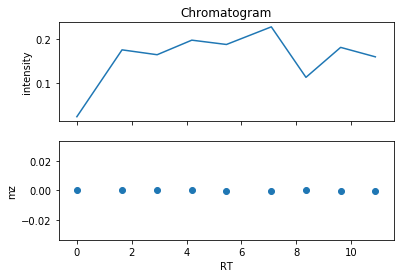

UnknownChemical mz=295.3832 rt=970.16 max_intensity=985002.46
[438828.      504558.6875  570724.9375  449026.59375 568663.75
 775865.8125  491207.8125  566865.1875  551187.875  ]


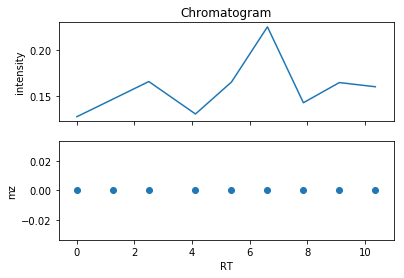

UnknownChemical mz=209.2666 rt=887.56 max_intensity=687822.65
[21098.65429688 12771.57519531 17033.19921875 21046.2578125
 14572.4375     26786.92578125 13209.19726562 17776.65234375
 23675.53320312 13257.28222656 17407.34570312 22469.9453125
 14230.88378906 36251.72265625 40448.46484375 16646.79882812
 42098.24609375 52263.3671875  47427.0234375  62863.9765625
 42006.234375   16431.97070312 38541.09375    54083.39453125
 54590.8359375  59162.95703125 43664.80859375 19443.5234375
 33078.4609375  56471.44140625 27986.14453125 20081.17773438
 17877.50976562 18100.18945312 51195.9375     44280.00390625
 20148.6875     14992.94042969 12172.74121094 19221.24023438
 12656.13769531 12831.73046875 16153.34472656]


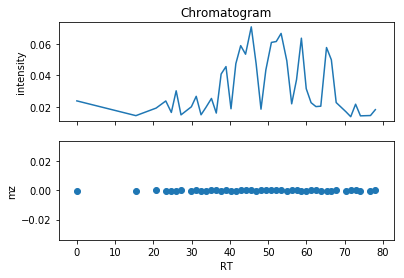

UnknownChemical mz=88.5818 rt=392.86 max_intensity=2112047.45
[ 29407.74804688 107816.7890625   75205.125      169571.015625
 119250.1484375   85334.609375   106358.671875    43927.46484375
  39731.28515625  24776.76171875]


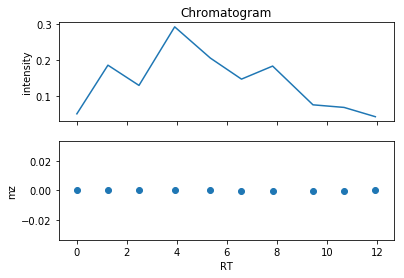

UnknownChemical mz=170.2607 rt=449.93 max_intensity=340774.25
[374281.53125 321079.9375  424950.9375  301046.6875  424439.0625
 440009.4375  284695.875   221310.84375]


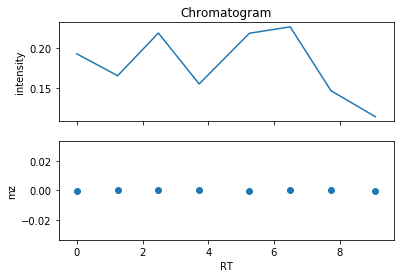

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in sampled_chemicals[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

Acquisition open


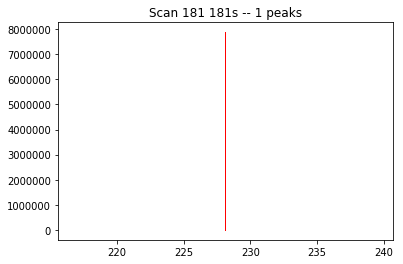

228.1437832781358 7878490.772579878


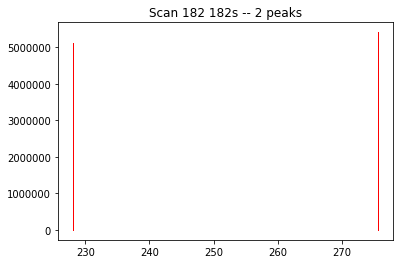

228.14410318154563 5125107.727152327
275.55743040743016 5410960.575272515


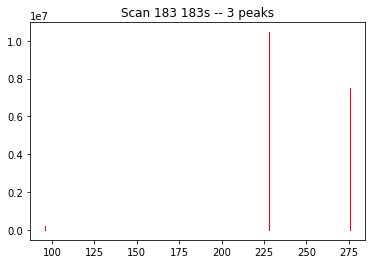

96.10989485791418 228627.32169142977
228.14331459675114 10449088.248818344
275.5574198545021 7525256.5088135805


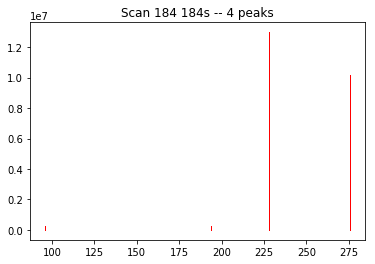

96.10986280984633 225256.71689023206
193.65737059954407 289658.36102330213
228.14297732685392 12982690.487989558
275.5574191755956 10150390.073514769


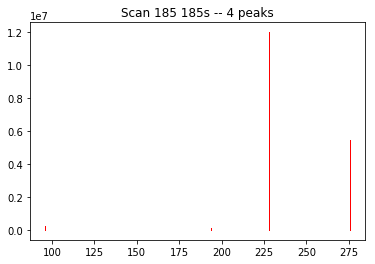

96.10986601868737 214719.82344049242
193.6572502620906 137563.9956414025
228.14321931620808 11973061.138272947
275.5573830173271 5434575.998097198


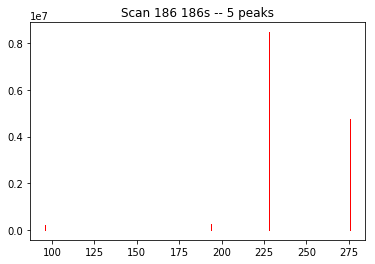

96.10989613471831 226420.19533253068
130.46031404566898 5001.415004984652
193.65753509965822 268393.92086485046
228.14384409140433 8468142.357200516
275.5574790898827 4769776.64178831


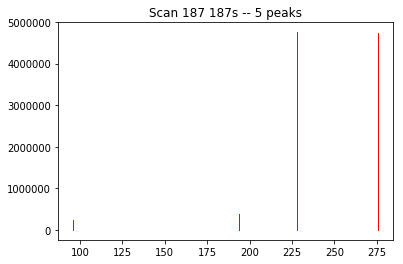

96.10989113850137 227831.5594798837
130.45971197261102 8802.54654005751
193.65754263056058 387894.1951189594
228.1441159225627 4755669.6955350395
275.5574540463508 4744857.196856747


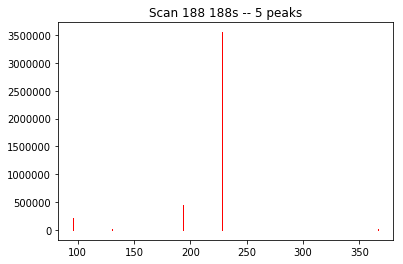

96.10987930998276 215684.2959675363
130.45949271888176 13601.26865144278
193.65729452159366 441905.29843479977
228.14418335898986 3552214.5248824465
366.4706104341317 8710.716448559033


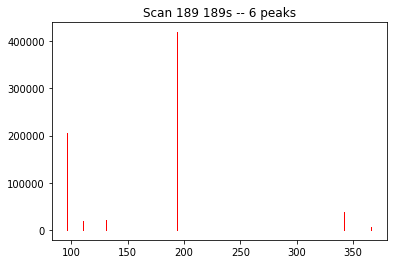

96.1098728719315 205874.81910818612
110.56339545447548 19875.353765344244
130.45959646675354 19981.73792308285
193.65694132347534 419305.8737953307
341.79574687458756 37828.407926458276
366.4709552655231 5967.922108369233


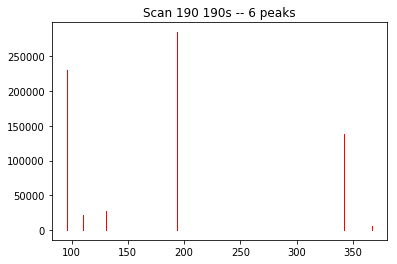

96.1098820089309 230460.65675667443
110.56341304468702 20789.12316716408
130.45978010282192 27248.633199748358
193.65709788563635 284857.7958877925
341.79510769707997 137566.39307737802
366.47061268499795 6141.456851031666


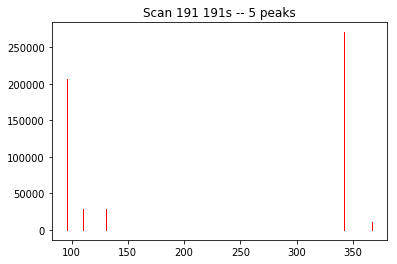

96.10990661546015 205852.39242214814
110.56333702049749 28476.804528139513
130.4594794370276 28199.86294515502
341.79441691924245 270485.589259594
366.47027665281723 10752.272893714468


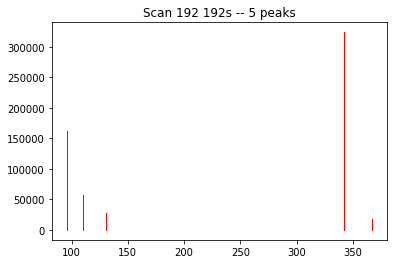

96.10993504521397 161357.81311995155
110.56324239234786 56950.88848866651
130.4593966159678 28088.207210696997
341.7939085233593 323883.23697685765
366.46997845218556 18640.5020107378


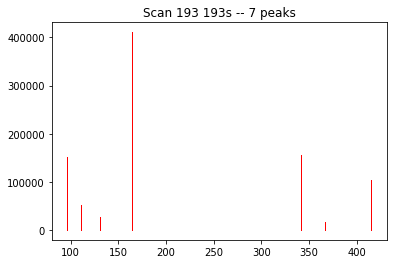

96.10994678274398 151662.60155903458
110.56346976497328 51498.68849237487
130.45946185973895 25940.33158229017
164.3442981705985 410733.7307103704
341.7939085233593 155611.87135799485
366.4689948074434 17022.58426295682
415.32759703642927 104386.64943804182


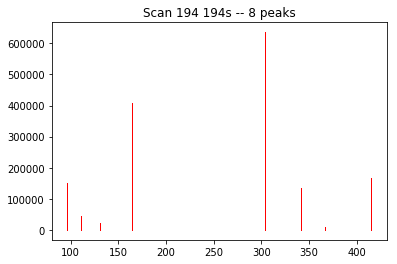

96.10993511303114 150802.3009262798
110.5635375689791 45652.056398534405
130.45926670336405 20857.935289280515
164.34444887685768 407572.0598819014
303.4152728916479 635655.7852779772
341.79524955986983 135613.6331241068
366.4688657072953 9334.801524893115
415.32754538953117 167029.05529903353


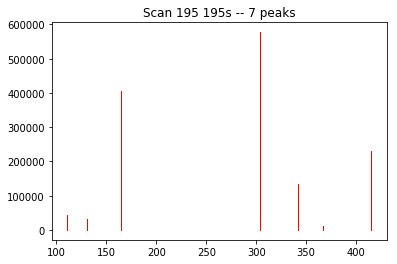

110.56343210639838 43022.38212326364
130.45952925623038 30793.767818917295
164.34456448620548 404769.76247959014
303.4153538924793 577324.8724452822
341.7956204539536 133519.79887450862
366.469005600883 12295.255980679434
415.3274937426331 229671.46116002527


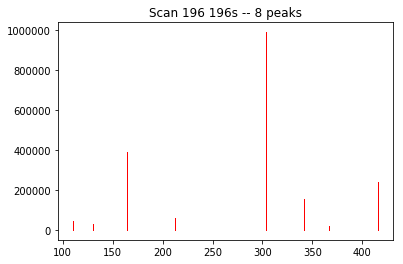

110.56350307750998 46239.113584484665
130.45953725927555 27343.126972412847
164.34450400273053 389845.4907229051
212.25711926976533 59230.0573985696
303.41539083870043 990780.694447261
341.79621865257354 154325.28544703967
366.4687968797829 17310.673119272433
415.32764101821203 240486.9600051753


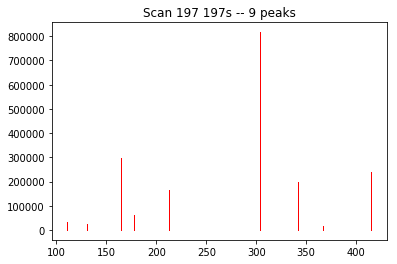

110.56347909415584 33642.316886449014
130.45941197532946 23351.8559427252
164.3443066376335 298998.27336422924
177.30979234599016 61544.93597838488
212.25719146077893 165473.14544652213
303.4153004152667 816701.5415679631
341.79811514784603 198085.71095079204
366.4679875381071 17413.32942550117
415.32764735663807 240596.95782041378


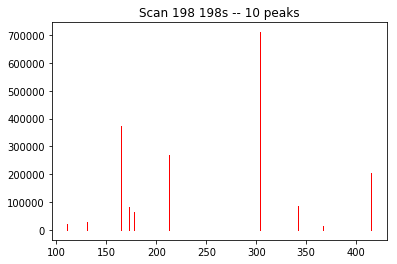

110.56343990998946 22738.67576715697
130.45919844922992 28981.486583035818
164.34451776188084 372708.58019967814
172.56164789532554 80590.45038509986
177.30986330193934 62944.84077211215
212.2570910818537 269108.7889264219
303.415323359767 710476.9769136086
341.79762391922765 84633.05029526463
366.4677667517702 14354.614693750476
415.32754153818155 205928.72634512416


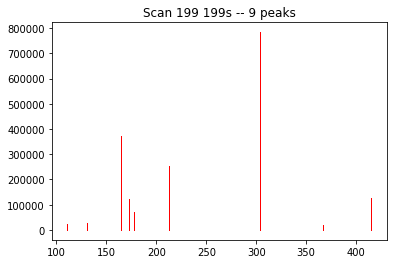

110.56339222627386 25282.027150776143
130.4591007929803 26254.538540944275
164.3445221870992 373789.9811801295
172.5615663784762 121707.51478671581
177.3096520263985 71146.46645067053
212.25686931987562 254270.27302568805
303.41543942453217 783595.302493417
366.46759012614604 17788.57396242752
415.3273693656668 126164.65718242002


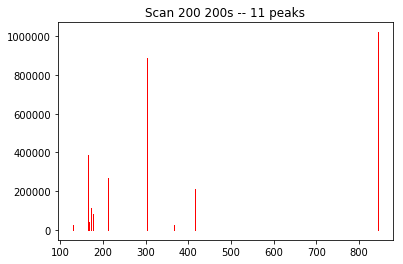

130.45904213550577 22822.45983022792
164.34444863330023 389464.2513167357
166.38862341699033 40366.47449760805
172.56130564516474 112391.13632934059
177.30975655319332 80538.05185616536
212.25684476832453 269307.4256934935
303.41535328620637 887328.600962372
304.05723577216145 365792.1458048327
366.46773441072247 24395.793563597206
415.3273317341418 213039.4231718852
843.8503942489255 1020824.4173078425


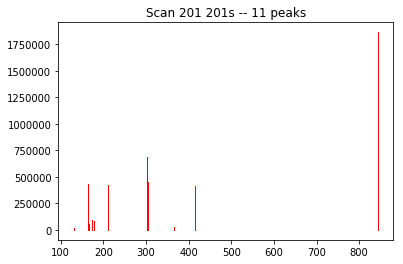

130.45938006140798 21980.302587422568
164.3443929732488 434627.79542525334
166.38891259565403 51625.66332575826
172.56150237411399 97681.07006203869
177.3097759755729 80573.15295334675
212.25689986622126 423449.9812295264
303.41545640911124 683782.1606768492
304.057309308494 454581.4166447297
366.467890891368 23413.92634404587
415.327471392583 415801.45646364975
843.8502651360947 1865327.4277533481


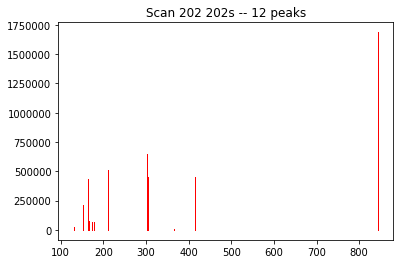

130.46003817307403 23430.237197852108
151.98528695869578 214796.0767354976
164.3443929732488 433794.7354770118
166.388958577566 79938.62756315217
172.56119477332555 65891.21278276305
177.3095828936182 67020.88366208172
212.25708484242733 510015.2069632203
303.4153867808965 647439.84284252
304.0572462077068 449989.8330037928
366.46784466547126 10510.40748142518
415.32763224018237 453045.03287736746
843.8502949742239 1687280.8799594042


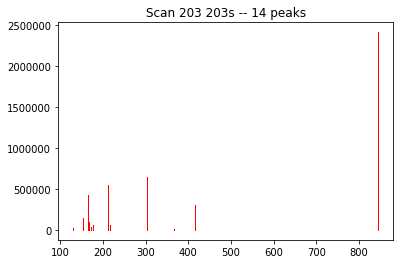

130.45986237158732 17925.860542112696
151.98531687789003 147642.30076317326
164.3443929732488 432335.3985108066
166.38878271116414 100905.26108086025
172.56145965510024 34486.94700397367
177.30992197781978 57190.47486653387
211.92652192697975 152026.6857334155
212.2571979647633 544787.6963024752
215.41281896576984 56245.85838341556
303.41529215502635 647223.8095665495
304.0573573054323 483888.5877641061
366.46813952129895 16022.069440814295
415.32775909472355 299757.6303956848
843.8504058747259 2414038.865971584


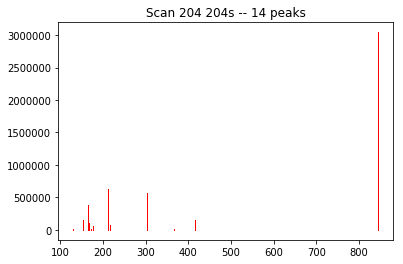

130.45978297627954 14953.888251789751
151.98530834682248 157974.5039448554
164.3444121253356 390016.8728127889
166.38861053963083 104068.98430511952
172.5617692592782 15102.255170725743
177.3101740592652 64051.894871220604
211.92676712383692 160470.35887894503
212.25699593281027 625404.6573646467
215.41304046432066 69345.51437616107
303.4153028779982 568557.7168587544
304.05738249760924 478685.7715069237
366.46755907570844 11248.313394692299
415.3278859492647 146470.22791400223
843.8503655337678 3043342.8555281563


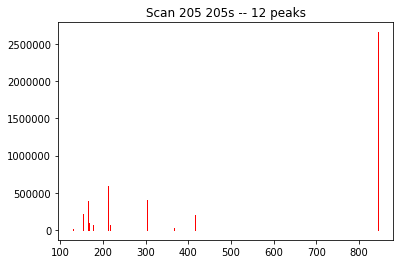

130.45965776175768 14691.393795251948
151.98528923832902 217849.24888507064
164.3444364120016 386821.323055842
166.3885881235032 89395.22541501225
177.31002992699285 64741.21586943813
211.92682925868215 179841.06964766458
212.25706952825558 596065.6361448157
215.41296828936493 71603.52813428927
304.05719075566435 399693.56335429684
366.46733307636754 23332.670348973847
415.3274856747512 198429.6350917731
843.8500682516046 2656316.607421951


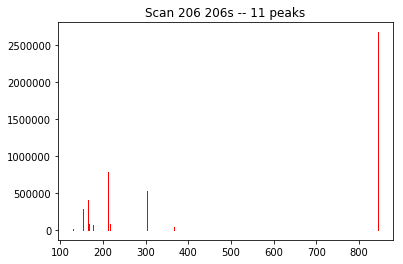

130.45946985267562 15101.788568665625
151.98528734638163 283934.37703638687
164.34446057944936 405580.5540764153
166.38860656684164 83323.5170124408
177.30977649608624 60504.07543776062
211.9267093274178 256024.89969906193
212.25700569952969 777339.9349143078
215.41305304096278 79633.38738899196
304.0570679979081 521043.6071615551
366.46743258812506 37633.54683882334
843.8500682516046 2673416.476861835


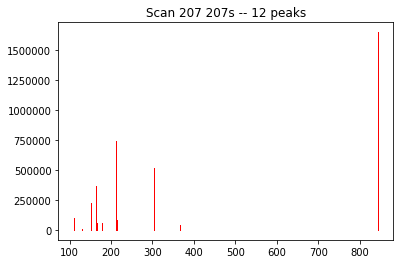

109.70708950284927 102844.80774362717
130.4597680006826 11091.409507370272
151.98525517423602 222326.91572736262
164.3444838223753 366679.5043495567
166.38892149604976 55481.888830850294
177.3096923997667 54323.18828867446
211.92668487423032 490270.0022317578
212.25716786656574 741142.1484268418
215.41316840545426 84782.42790280985
304.0572102150751 513548.6125525032
366.4676261148108 39043.73735740989
843.8501978620594 1650641.7808918806


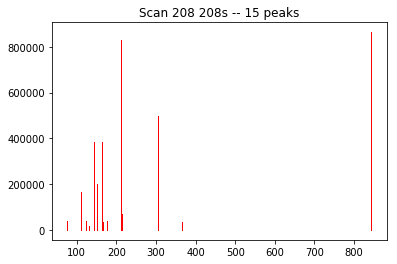

75.58154287306763 38340.8095712698
109.70729969440679 166047.73109369015
123.8784920251691 38611.09974331798
130.4601355157257 15866.557726653877
142.9375679327099 385853.40396110364
151.98524051357643 199109.83417078134
164.34445919156175 386056.73197414767
166.38891772532614 35780.95432279792
177.30952285766585 37918.59327549075
211.92649419645812 828724.5632798192
212.25737423024103 566448.2049064036
215.4129768798183 69519.2604171644
304.0572368427189 499129.51718868373
366.46765072576073 36688.856390937384
843.850232508883 864101.2551460111


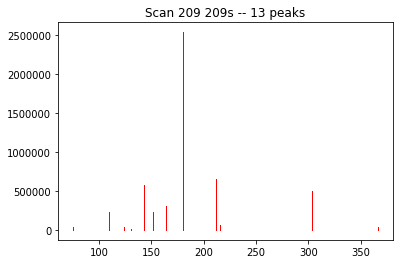

75.58160730145185 43484.43747834312
109.70695789753155 230248.12830738953
123.87860572011118 31777.41328808722
130.46016199143938 17474.81536117256
142.93754480463363 574473.0366942204
151.98525401320742 228552.46032218373
164.3445123513745 305974.1628400543
180.22234450544755 2533405.296457304
211.92659499244292 647313.5801564066
212.25724662193952 558055.4257199022
215.41314929551405 62644.13304652862
304.05715857799964 503903.4486087157
366.4664986940345 36136.10424306903


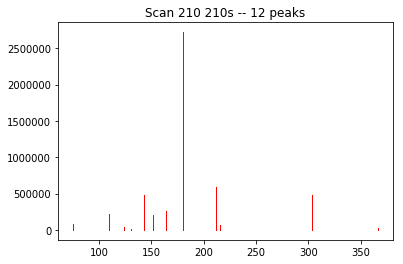

75.5813647806915 77707.65798566137
109.7070273088287 222650.61430574
123.8784769539586 37654.34421744242
130.45984646845605 13227.921412192456
142.93749893395295 475443.30685866636
151.9852835845041 210448.97405008046
164.34450487846232 259060.6674713123
180.2223624068643 2720316.6846930003
212.2574435095403 591755.9869071635
215.41301214996304 74228.17124253225
304.0572535387091 486520.35821496596
366.4668313178301 31477.585809540087


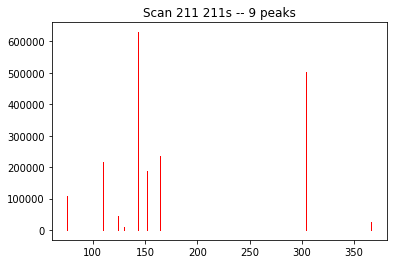

75.58086435558323 108156.5320104348
109.70710685207204 216027.75892360607
123.87851863852912 43983.92596451988
130.45961220930812 10153.864624451424
142.93784182808938 629354.0207622637
151.98528923832902 188260.72513699863
164.34442333664896 236282.41861440463
304.057228987158 501949.2388338601
366.4674980708272 25649.73469951282


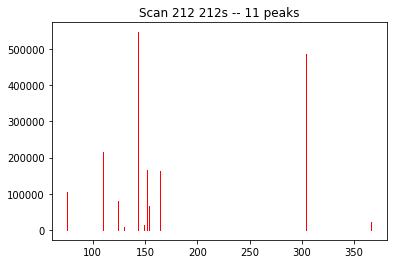

75.58052949054846 104679.75182994905
109.7071520949908 216417.05602529817
123.87846717452275 79854.18783370755
130.45951663737569 8732.148377379262
142.93771785212513 546913.7420561201
149.5751311343807 14273.449419681448
151.98528923832902 165106.8836654436
154.0740381476062 66878.63121250538
164.34434427721894 162020.57639897492
304.05737177120534 487478.33840977383
366.46736400470087 23053.506650909385


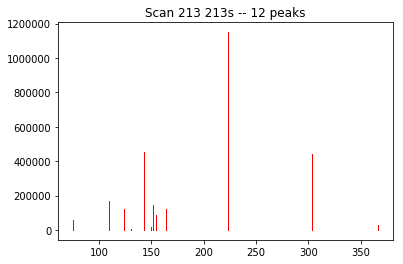

75.58148068778873 59352.68646689511
109.7071520949908 165745.60151581155
123.87827833217993 119035.26733107016
130.45945211818304 7680.399186359107
142.93754739704153 453646.3877380029
149.5752173326545 15959.646374069567
151.9852890857136 142511.3702810102
154.07405726737704 84853.08604490437
164.34451669291465 124441.84787281742
223.76016307200157 1149912.5094603582
304.0573156472678 439930.76729065855
366.4674873578868 30287.716637683967


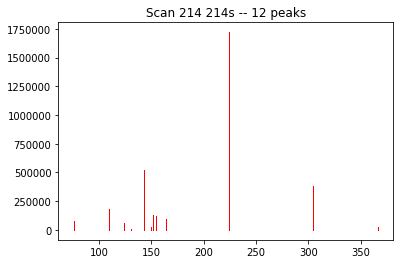

75.5806555224267 76186.98442713876
109.70710171125933 183639.5242367281
123.87823945628438 58826.74890511536
130.4593875989904 6628.649995338951
142.9375963819179 521103.97550877125
149.57533768034992 23482.928710545628
151.985285153036 133744.8320814169
154.07406328897542 117180.2061112192
164.3445045806511 96500.15616672848
223.75975306305162 1720619.1835537865
304.0571358186117 382434.6850345062
366.4674784975786 24112.683892475685


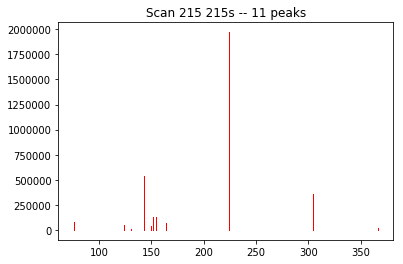

75.57977708574327 78546.75313815495
123.8782829417613 44610.72886906034
130.45931874063305 5735.05731033036
142.93762190854108 536051.6826088756
149.57535649513287 38048.49348354706
151.98528122035836 124978.29388182361
154.0740882208937 125464.65838114962
164.344612075476 65257.84813794474
223.7592523539697 1970633.884152118
304.05726431367765 357813.45950496447
366.4675348194255 19194.77939017567


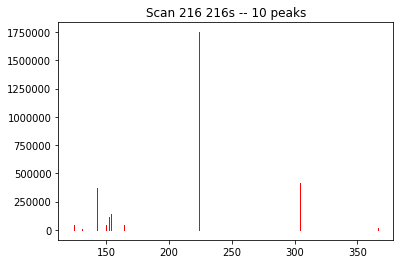

123.8784765797925 43473.93951202239
130.45912295825534 9467.668298898114
142.93778065543208 370574.25283137616
149.5754832588396 45980.428143147496
151.98527728768076 116211.75568223032
154.0741497979276 142338.6759903469
164.3446189462997 39906.48431012416
223.75933157290638 1747615.5501034902
304.05718017394514 416554.8823598656
366.4677784992502 14166.30118945132


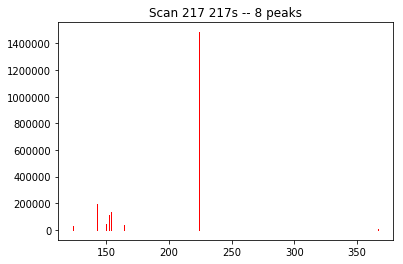

123.87877110750385 31000.04071025188
142.9378798221223 191380.69111036975
149.57571305492237 46664.786828872115
151.98527275156565 111978.26268808922
154.07415461204704 132017.39876413954
164.34420986777977 34922.72306754606
223.759185088532 1483994.1063709692
366.4680687002963 8587.972794695837


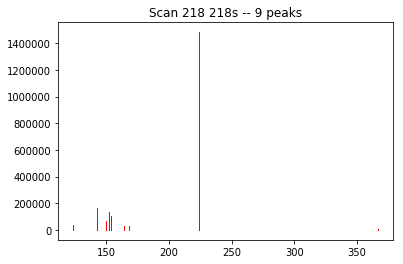

123.87883258530078 35016.06706212338
142.93768566088428 162545.07423277324
149.5755665705471 65015.67404128372
151.9852650190712 131756.09084203708
154.07409163601815 106359.36883900195
164.34420986777977 28411.33627228207
168.26749522160443 31322.701824010594
223.75927385739726 1481676.527195682
366.4676736507413 10432.312090130039


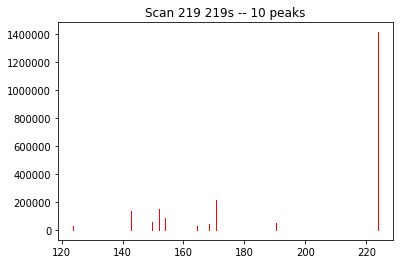

123.87845568573645 29119.217063963282
142.93749149964626 133709.45735517677
149.57555100700918 54834.938055857885
151.98525728657674 151533.91899598498
154.0740304872466 83171.2350126856
164.34449868688003 29715.95494452313
168.2674884571952 44816.74786614841
170.76561197761004 210803.0381823247
190.32890222105024 46918.3864118532
223.75941909148756 1413623.6554056278


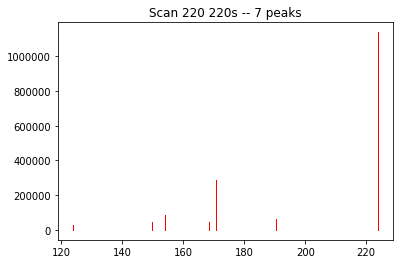

123.8783023439772 29235.38286616655
149.575583962196 43300.52102928544
154.07410215167525 85341.95908970735
168.26736454272827 46112.21869717747
170.76567108524225 287204.3847314103
190.32885857788884 63863.72919087653
223.75957472616395 1138030.9170249149


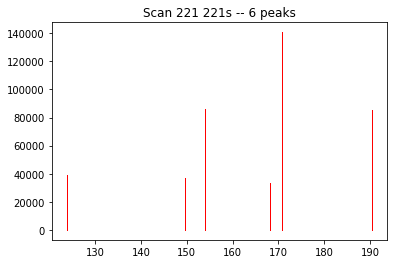

123.87854733092574 39443.99833105918
149.57570106361047 37260.02156789032
154.07405281040118 85743.51707545477
168.26780169766758 33141.24910090293
170.76550190698592 140710.00631953662
190.32890671286992 85055.11382663406


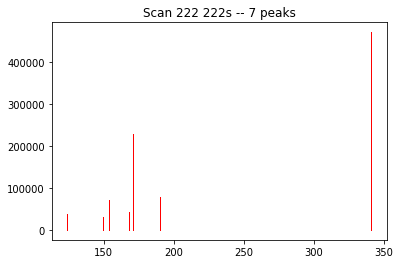

123.8784245731703 36865.500216769695
149.57557909087583 30116.42423795721
154.0740612783185 70595.51018387712
168.26780499502883 42293.672910994836
170.76560795262455 227446.58060632617
190.32891745743228 77266.04014897617
340.9174264326481 470587.15514570696


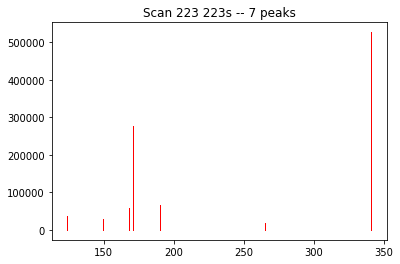

123.87829134767497 37130.1386459581
149.57553221421352 27843.756433011604
168.26759135496798 58787.264514831506
170.76559633521353 277443.8677855522
190.32892266403607 65464.47718745462
264.9182312935441 17609.799106245115
340.9173781835125 526327.0979595892


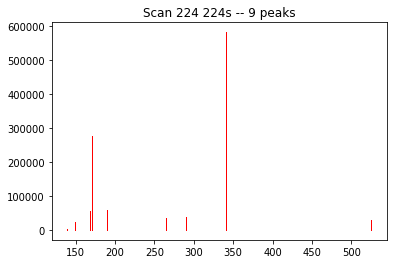

139.16764629220802 3496.7895243390126
149.5757743633381 22906.148202098346
168.26759773633367 54643.05876362226
170.76560444146278 275798.0083838798
190.32893252629677 58034.33982787139
264.918240992873 35600.478713789045
289.5545752470043 39151.29807557582
340.9173299343769 582067.0407734715
525.5267701661071 30177.06596171443
Acquisition closing


In [11]:
max_rt = 225
mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals)
controller = SimpleMs1Controller(mass_spec)
controller.run(max_rt)

### Set up a Top-N controller

Acquisition open
Scan 181 -- num_peaks=1 rt=181.00 ms_level=1
Isolated precursor ion 228.1437832781358 window [[(228.1426425592194, 228.1449239970522)]]



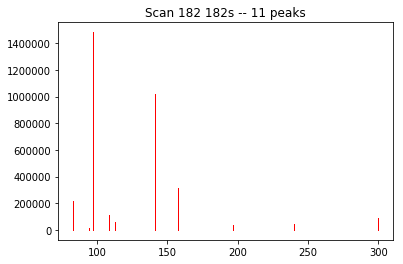

83.26192488550714 213420.7153204464
94.07575895383697 12898.119072285865
97.10181657684662 1481664.311915199
97.36752663770271 15129.828750956889
108.54793967690073 109694.46487130679
113.1152558497648 58932.00622546372
141.26918023959212 1019424.2322815354
157.87026257654827 312768.1297635907
196.69641454252616 34808.15742937974
239.7500260832551 46264.0758295987
299.62931847151845 90206.35061193524

Scan 183 -- num_peaks=3 rt=183.00 ms_level=1
Excluded precursor ion 228.14331459675114 183 ExclusionItem(from_mz=228.1426425592194, to_mz=228.1449239970522, from_rt=151, to_rt=211)
Isolated precursor ion 275.5574198545021 window [[(275.5560420674028, 275.55879764160136)]]
Isolated precursor ion 96.10989485791418 window [[(96.1094143084399, 96.11037540738847)]]



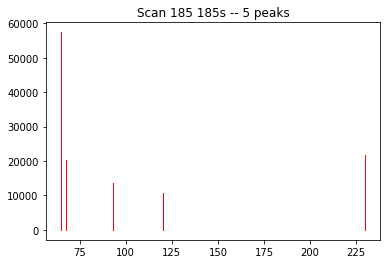

64.80272637583164 57411.56588720844
67.76809986182435 20208.799337759734
93.2815423260421 13533.455999951859
120.18307825082428 10854.008380705824
229.82435837061226 21646.00339215692

Scan 186 -- num_peaks=5 rt=186.00 ms_level=1
Excluded precursor ion 228.14384409140433 186 ExclusionItem(from_mz=228.1426425592194, to_mz=228.1449239970522, from_rt=151, to_rt=211)
Excluded precursor ion 275.5574790898827 186 ExclusionItem(from_mz=275.5560420674028, to_mz=275.55879764160136, from_rt=153, to_rt=213)
Isolated precursor ion 193.65753509965822 window [[(193.6565668119827, 193.65850338733372)]]
Excluded precursor ion 96.10989613471831 186 ExclusionItem(from_mz=96.1094143084399, to_mz=96.11037540738847, from_rt=153, to_rt=213)
Isolated precursor ion 130.46031404566898 window [[(130.45966174409875, 130.4609663472392)]]



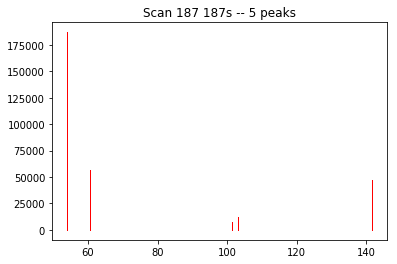

54.051752973762376 186971.82653565524
60.55884469720331 56945.373503241404
101.37356640109182 7176.125889893932
103.25067024381948 11998.10359791982
141.59679671363278 47348.6483004945

Scan 189 -- num_peaks=6 rt=189.00 ms_level=1
Excluded precursor ion 193.65694132347534 189 ExclusionItem(from_mz=193.6565668119827, to_mz=193.65850338733372, from_rt=156, to_rt=216)
Excluded precursor ion 96.1098728719315 189 ExclusionItem(from_mz=96.1094143084399, to_mz=96.11037540738847, from_rt=153, to_rt=213)
Isolated precursor ion 341.79574687458756 window [[(341.7940378958532, 341.79745585332194)]]
Isolated precursor ion 130.45959646675354 window [[(130.4589441687712, 130.46024876473587)]]
Isolated precursor ion 110.56339545447548 window [[(110.5628426374982, 110.56394827145276)]]



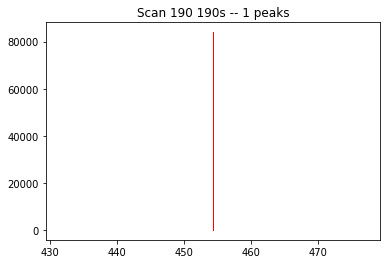

454.288883025581 83973.60502479556



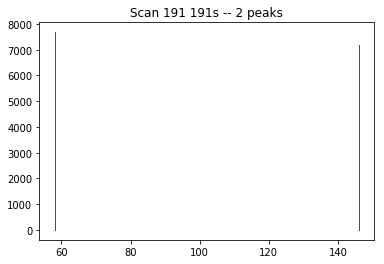

58.00930547075374 7678.461036149281
146.04407430278218 7201.690911990776



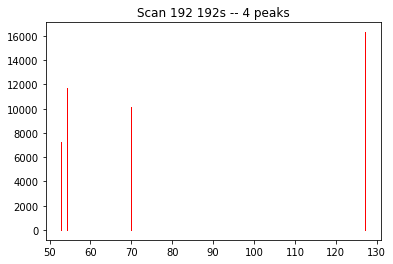

52.772452841015635 7242.222189513132
54.16671363074294 11720.389297462725
70.00311722465942 10170.508096048907
127.21503821306878 16308.337268398915

Scan 193 -- num_peaks=7 rt=193.00 ms_level=1
Isolated precursor ion 164.3442981705985 window [[(164.34347644910764, 164.34511989208937)]]
Isolated precursor ion 341.7939085233593 window [[(341.79219955381666, 341.7956174929019)]]
Excluded precursor ion 96.10994678274398 193 ExclusionItem(from_mz=96.1094143084399, to_mz=96.11037540738847, from_rt=153, to_rt=213)
Isolated precursor ion 415.32759703642927 window [[(415.3255203984441, 415.32967367441444)]]
Excluded precursor ion 110.56346976497328 193 ExclusionItem(from_mz=110.5628426374982, to_mz=110.56394827145276, from_rt=159, to_rt=219)



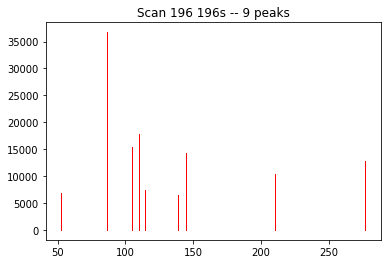

52.46761990124482 6893.500051487705
86.29683074685343 36735.09584563127
105.22826610383471 15364.060950390374
109.81190655022894 17761.690297803987
114.11437410342545 7412.742965184892
138.94082347641458 6576.6673241943545
144.73183576701865 14280.215444847203
210.40177252785196 10333.228838661198
276.90348115722105 12745.641673879476

Scan 197 -- num_peaks=9 rt=197.00 ms_level=1
Isolated precursor ion 303.4153004152667 window [[(303.41378333876463, 303.41681749176877)]]
Excluded precursor ion 164.3443066376335 197 ExclusionItem(from_mz=164.34347644910764, to_mz=164.34511989208937, from_rt=163, to_rt=223)
Excluded precursor ion 415.32764735663807 197 ExclusionItem(from_mz=415.3255203984441, to_mz=415.32967367441444, from_rt=163, to_rt=223)
Isolated precursor ion 341.79811514784603 window [[(341.79640615727027, 341.7998241384218)]]
Isolated precursor ion 212.25719146077893 window [[(212.2561301748216, 212.25825274673625)]]



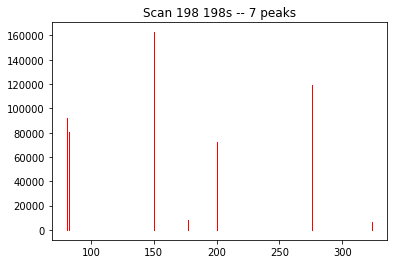

81.11077122208631 91951.09858747628
82.74800982804099 80489.73231037945
150.07436920473307 162625.29167399285
177.4796849006282 8201.39663391765
200.68697296976896 72635.00278747472
275.8481035277293 118865.43881722372
323.33693652952064 6214.792043665158



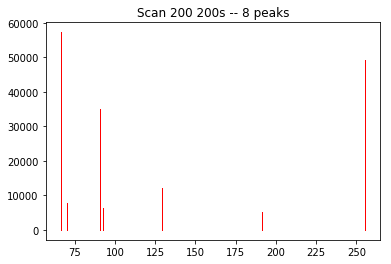

66.45245415319971 57305.6047142108
70.2918806281678 7797.700256439096
70.4820274747366 7086.72360252848
90.71974528522296 35164.56415639335
92.9697516991505 6333.300801498959
129.5996924279932 12151.179613959222
191.61634061570226 5179.963734547797
255.4563448665129 49316.20996815586

Scan 201 -- num_peaks=11 rt=201.00 ms_level=1
Isolated precursor ion 843.8502651360947 window [[(843.846045884769, 843.8544843874204)]]
Excluded precursor ion 303.41545640911124 201 ExclusionItem(from_mz=303.41378333876463, to_mz=303.41681749176877, from_rt=167, to_rt=227)
Isolated precursor ion 304.057309308494 window [[(304.0557890219474, 304.05882959504055)]]
Excluded precursor ion 164.3443929732488 201 ExclusionItem(from_mz=164.34347644910764, to_mz=164.34511989208937, from_rt=163, to_rt=223)
Excluded precursor ion 212.25689986622126 201 ExclusionItem(from_mz=212.2561301748216, to_mz=212.25825274673625, from_rt=167, to_rt=227)



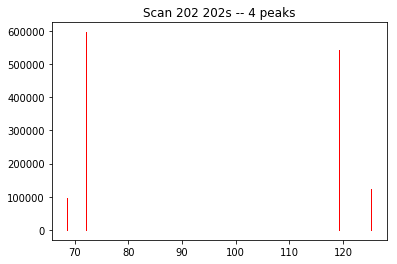

68.58125329825796 95032.13760073896
72.13635295475584 595717.9782849074
119.1705980284973 541214.3347340834
125.2841384151536 122059.0395715481



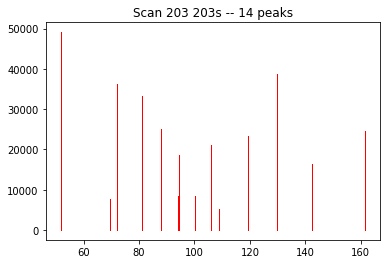

51.75369654840709 49105.893051245694
69.5089202682756 7577.968726584976
71.88136874242477 36240.18320901344
80.97983657853403 33285.18365002908
87.78530014951001 24995.921871122075
94.14580618971522 8432.203630171269
94.46735686750654 18519.044433234467
100.16266202757309 8499.732965701533
105.99259684390874 21218.113646166064
108.89416253498908 5281.561960729658
119.3864308546979 23429.023902188404
129.75450932244308 38790.704504278714
142.34732356385948 16260.898954427637
161.59712662929087 24557.682204654913

Scan 204 -- num_peaks=14 rt=204.00 ms_level=1
Excluded precursor ion 843.8503655337678 204 ExclusionItem(from_mz=843.846045884769, to_mz=843.8544843874204, from_rt=171, to_rt=231)
Excluded precursor ion 212.25699593281027 204 ExclusionItem(from_mz=212.2561301748216, to_mz=212.25825274673625, from_rt=167, to_rt=227)
Excluded precursor ion 303.4153028779982 204 ExclusionItem(from_mz=303.41378333876463, to_mz=303.41681749176877, from_rt=167, to_rt=227)
Excluded precursor ion 304.0

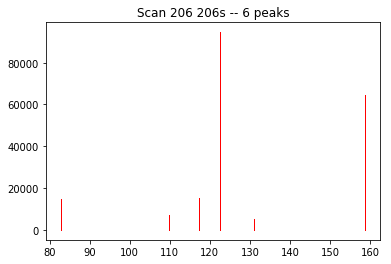

82.79933137116419 14828.245215321402
109.8974435359434 7297.395439818273
117.23869828314699 15141.737910274349
122.41855332561458 94557.14250938328
131.11421210943968 5269.987862076198
158.760821141415 64353.003796093384

Scan 207 -- num_peaks=12 rt=207.00 ms_level=1
Excluded precursor ion 843.8501978620594 207 ExclusionItem(from_mz=843.846045884769, to_mz=843.8544843874204, from_rt=171, to_rt=231)
Excluded precursor ion 212.25716786656574 207 ExclusionItem(from_mz=212.2561301748216, to_mz=212.25825274673625, from_rt=167, to_rt=227)
Excluded precursor ion 304.0572102150751 207 ExclusionItem(from_mz=304.0557890219474, to_mz=304.05882959504055, from_rt=171, to_rt=231)
Isolated precursor ion 211.92668487423032 window [[(211.92562524080594, 211.9277445076547)]]
Excluded precursor ion 164.3444838223753 207 ExclusionItem(from_mz=164.34347644910764, to_mz=164.34511989208937, from_rt=163, to_rt=223)



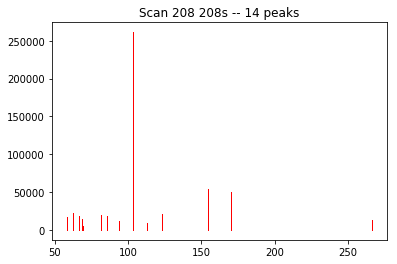

58.47689810776411 17401.54810099249
62.11976435611639 22008.751685562627
66.65411997301003 18338.622642063106
68.31802284765476 14202.531102720108
69.50332157698566 5292.906028371432
81.47781521524472 19470.11189024983
85.89992990958194 18288.78071781744
94.09737871883482 12256.549480149255
103.61662169278084 261361.76427644186
113.0262849257642 8851.834809288537
123.03006402602938 21137.98612948443
154.23240518448452 54272.130661662435
170.32358032368825 49519.136251600416
265.9850810078838 13600.555319844912

Scan 209 -- num_peaks=13 rt=209.00 ms_level=1
Isolated precursor ion 180.22234450544755 window [[(180.22144339372502, 180.22324561717008)]]
Excluded precursor ion 211.92659499244292 209 ExclusionItem(from_mz=211.92562524080594, to_mz=211.9277445076547, from_rt=177, to_rt=237)
Isolated precursor ion 142.93754480463363 window [[(142.9368301169096, 142.93825949235767)]]
Excluded precursor ion 212.25724662193952 209 ExclusionItem(from_mz=212.2561301748216, to_mz=212.25825274673625, 

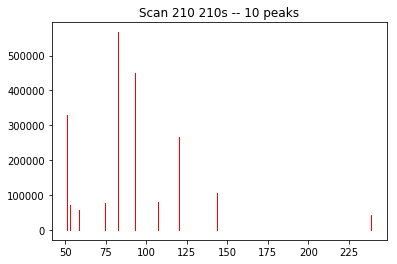

51.19338185796159 329437.88391837524
53.036911937741905 71263.59768746297
58.75309988078827 57113.19778087231
74.63320231478434 77349.16268253567
82.5853903362626 566761.2961031173
93.29231863904798 450605.8536774657
107.31956557301616 80963.80202134971
120.47654166503366 266281.3330479645
143.79636489878948 105983.43415271331
239.00209938606156 43195.316691025575



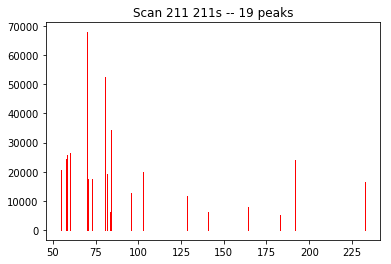

54.69157212514268 20483.31580588997
57.60371385772315 24520.37921032138
58.45692373401022 25574.12797918301
59.84725537814869 26444.611133764145
69.9964831862578 67907.24550145588
70.68679162434123 17489.8774788673
72.77340804942365 17337.64450596039
80.36804670152254 52692.3237985524
81.92653804307348 19379.411109230055
83.59734127020802 6258.388070190608
84.27797456907523 34211.596103401556
95.91757581884755 12510.694966077479
102.98723523930151 20041.611713571852
128.69527856730818 11794.34047786408
141.0901027072746 6100.182005628281
163.9193482803573 7981.394495328875
182.6327692400361 5206.573115334199
191.7872463139508 23966.827708473003
232.73413856431947 16389.54176184245

Scan 212 -- num_peaks=11 rt=212.00 ms_level=1
Excluded precursor ion 142.93771785212513 212 ExclusionItem(from_mz=142.9368301169096, to_mz=142.93825949235767, from_rt=179, to_rt=239)
Excluded precursor ion 304.05737177120534 212 ExclusionItem(from_mz=304.0557890219474, to_mz=304.05882959504055, from_rt=171, 

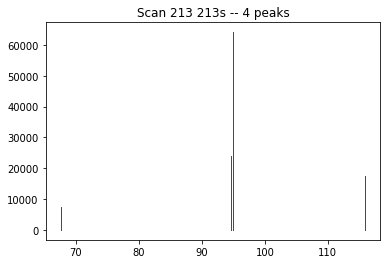

67.58527459075587 7311.387667367133
94.6103666934265 24002.298514743135
94.86947103429684 64113.82543649985
115.93463648874115 17478.529619371344

Scan 214 -- num_peaks=12 rt=214.00 ms_level=1
Isolated precursor ion 223.75975306305162 window [[(223.7586342642863, 223.76087186181695)]]
Excluded precursor ion 142.9375963819179 214 ExclusionItem(from_mz=142.9368301169096, to_mz=142.93825949235767, from_rt=179, to_rt=239)
Excluded precursor ion 304.0571358186117 214 ExclusionItem(from_mz=304.0557890219474, to_mz=304.05882959504055, from_rt=171, to_rt=231)
Excluded precursor ion 109.70710171125933 214 ExclusionItem(from_mz=109.70660355923033, to_mz=109.70770063075128, from_rt=182, to_rt=242)
Excluded precursor ion 151.985285153036 214 ExclusionItem(from_mz=151.98452931188282, to_mz=151.9860491647752, from_rt=175, to_rt=235)



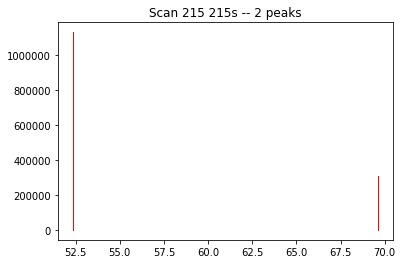

52.37026329425973 1128426.8610177883
69.60119864452979 307272.23229814926

Scan 216 -- num_peaks=10 rt=216.00 ms_level=1
Excluded precursor ion 223.75933157290638 216 ExclusionItem(from_mz=223.7586342642863, to_mz=223.76087186181695, from_rt=184, to_rt=244)
Excluded precursor ion 304.05718017394514 216 ExclusionItem(from_mz=304.0557890219474, to_mz=304.05882959504055, from_rt=171, to_rt=231)
Excluded precursor ion 142.93778065543208 216 ExclusionItem(from_mz=142.9368301169096, to_mz=142.93825949235767, from_rt=179, to_rt=239)
Isolated precursor ion 154.0741497979276 window [[(154.0733794271786, 154.07492016867658)]]
Excluded precursor ion 151.98527728768076 216 ExclusionItem(from_mz=151.98452931188282, to_mz=151.9860491647752, from_rt=175, to_rt=235)



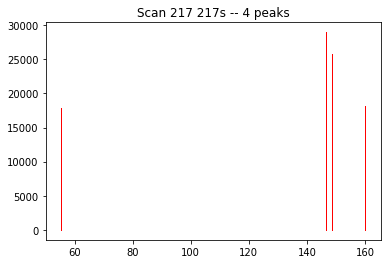

55.2965701371982 17870.15139335521
146.4567252229654 28951.984119835404
148.6353291442688 25757.780041397073
160.09838319383573 18086.601648518495

Scan 218 -- num_peaks=9 rt=218.00 ms_level=1
Excluded precursor ion 223.75927385739726 218 ExclusionItem(from_mz=223.7586342642863, to_mz=223.76087186181695, from_rt=184, to_rt=244)
Excluded precursor ion 142.93768566088428 218 ExclusionItem(from_mz=142.9368301169096, to_mz=142.93825949235767, from_rt=179, to_rt=239)
Excluded precursor ion 151.9852650190712 218 ExclusionItem(from_mz=151.98452931188282, to_mz=151.9860491647752, from_rt=175, to_rt=235)
Excluded precursor ion 154.07409163601815 218 ExclusionItem(from_mz=154.0733794271786, to_mz=154.07492016867658, from_rt=186, to_rt=246)
Isolated precursor ion 149.5755665705471 window [[(149.57481869271425, 149.57631444837995)]]



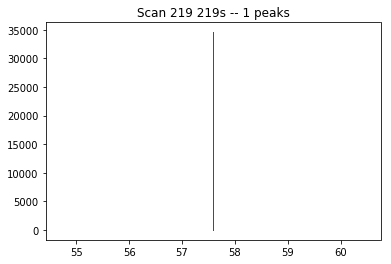

57.588319610088995 34577.57063365725

Scan 220 -- num_peaks=7 rt=220.00 ms_level=1
Excluded precursor ion 223.75957472616395 220 ExclusionItem(from_mz=223.7586342642863, to_mz=223.76087186181695, from_rt=184, to_rt=244)
Isolated precursor ion 170.76567108524225 window [[(170.7648172568868, 170.7665249135977)]]
Excluded precursor ion 154.07410215167525 220 ExclusionItem(from_mz=154.0733794271786, to_mz=154.07492016867658, from_rt=186, to_rt=246)
Isolated precursor ion 190.32885857788884 window [[(190.32790693359595, 190.32981022218172)]]
Isolated precursor ion 168.26736454272827 window [[(168.26652320590554, 168.268205879551)]]



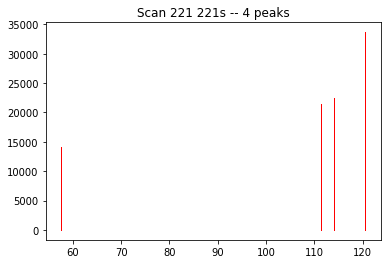

57.542510858065555 14060.126377967774
111.44065489188915 21357.07977704502
113.97092440845914 22514.977550228803
120.54782532999474 33656.85894455461



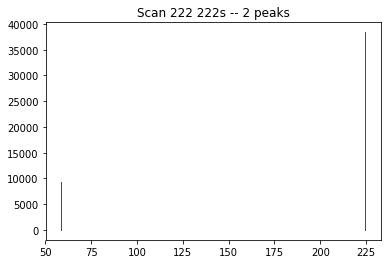

58.468030277872586 9387.173767615246
224.55017440508078 38398.25175163672



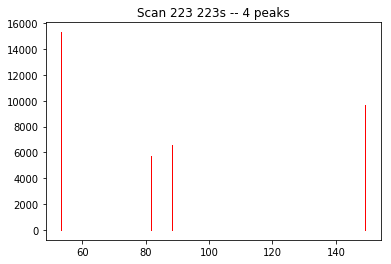

53.19963432939636 15311.363538873171
81.63390562003148 5720.3700518724945
88.38646226271483 6606.7346587842985
149.29425438887705 9666.401217556384

Scan 224 -- num_peaks=9 rt=224.00 ms_level=1
Isolated precursor ion 340.9173299343769 window [[(340.9156253477272, 340.91903452102656)]]
Excluded precursor ion 170.76560444146278 224 ExclusionItem(from_mz=170.7648172568868, to_mz=170.7665249135977, from_rt=190, to_rt=250)
Excluded precursor ion 190.32893252629677 224 ExclusionItem(from_mz=190.32790693359595, to_mz=190.32981022218172, from_rt=190, to_rt=250)
Excluded precursor ion 168.26759773633367 224 ExclusionItem(from_mz=168.26652320590554, to_mz=168.268205879551, from_rt=190, to_rt=250)
Isolated precursor ion 289.5545752470043 window [[(289.5531274741281, 289.55602301988057)]]



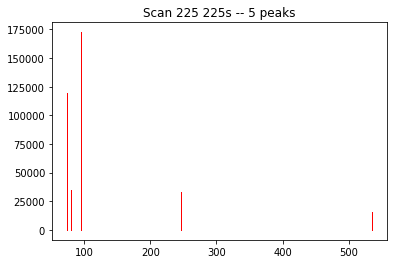

74.9106679546936 119721.5264009143
80.73492091067438 34612.38761951832
96.0917588599211 172563.5786144273
245.91267592626394 33031.42373097862
534.0894033713727 15946.519539569248



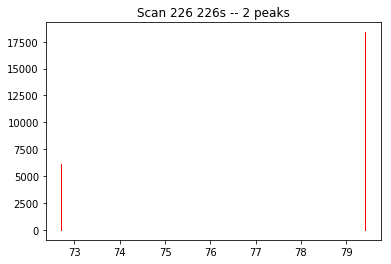

72.70334331608419 6111.247164155965
79.42212165109213 18379.544288479232

Scan 227 -- num_peaks=12 rt=227.00 ms_level=1
Isolated precursor ion 228.07789697539653 window [[(228.07675658591165, 228.0790373648814)]]
Isolated precursor ion 434.2176893214226 window [[(434.21551823297597, 434.2198604098692)]]
Excluded precursor ion 340.9182109696469 227 ExclusionItem(from_mz=340.9156253477272, to_mz=340.91903452102656, from_rt=194, to_rt=254)
Excluded precursor ion 170.76561030482463 227 ExclusionItem(from_mz=170.7648172568868, to_mz=170.7665249135977, from_rt=190, to_rt=250)
Isolated precursor ion 290.09726393524585 window [[(290.09581344892615, 290.09871442156555)]]



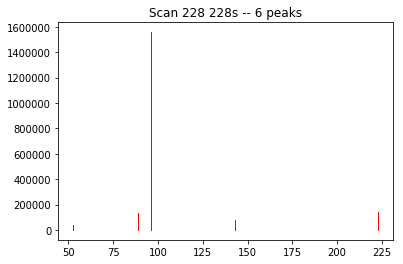

52.80583241930576 39613.01584641761
88.68618407338087 135177.66315567988
95.97024759646611 1556641.9272959186
96.02686158896589 951352.5658311353
142.81027837830965 78891.47724501572
222.70105096416592 139907.30852671489



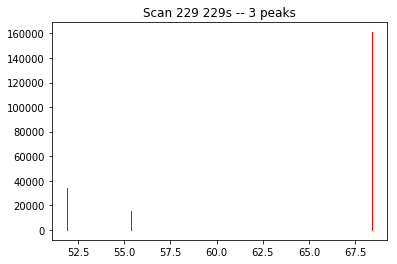

51.91998074811973 34030.311769119464
55.382351429681414 15455.709856954274
68.3747822756029 160934.69651395179



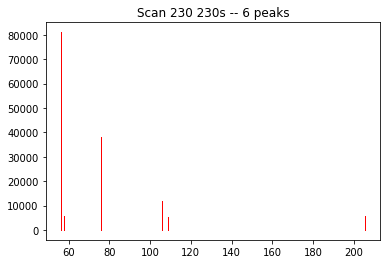

56.09052438766189 81021.0273020632
57.594336097663785 5657.224145342692
75.90559580640034 38042.07265782042
105.73347460623414 11795.067747422936
108.94653137427687 5234.432699227459
205.65102462169486 5855.011383994307

Scan 231 -- num_peaks=13 rt=231.00 ms_level=1
Excluded precursor ion 228.07785597460426 231 ExclusionItem(from_mz=228.07675658591165, to_mz=228.0790373648814, from_rt=197, to_rt=257)
Isolated precursor ion 125.40597309659475 window [[(125.40534606672927, 125.40660012646023)]]
Excluded precursor ion 434.2179029444696 231 ExclusionItem(from_mz=434.21551823297597, to_mz=434.2198604098692, from_rt=197, to_rt=257)
Excluded precursor ion 290.09708778815383 231 ExclusionItem(from_mz=290.09581344892615, to_mz=290.09871442156555, from_rt=197, to_rt=257)
Isolated precursor ion 525.5267610155911 window [[(525.524133381786, 525.5293886493962)]]



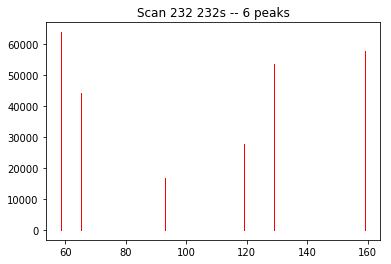

58.49711523094867 63956.89111486304
65.02243745050757 44226.15528111549
92.97587879165928 16767.84387759513
119.2142962359513 27842.9671935999
128.96135185940804 53609.58719656626
159.2173478514428 58001.672206236115



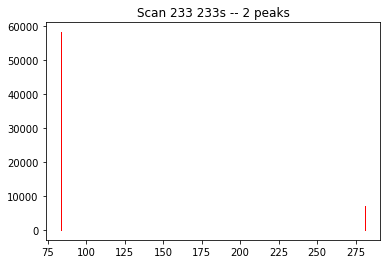

83.56990716546375 58204.4057274988
281.1405653086447 7134.215550336915

Scan 234 -- num_peaks=14 rt=234.00 ms_level=1
Isolated precursor ion 189.32185801245254 window [[(189.32091140316246, 189.32280462174262)]]
Isolated precursor ion 356.19790669003646 window [[(356.196125700503, 356.19968767956993)]]
Excluded precursor ion 125.40599515984948 234 ExclusionItem(from_mz=125.40534606672927, to_mz=125.40660012646023, from_rt=201, to_rt=261)
Isolated precursor ion 97.9289677913838 window [[(97.92847814654483, 97.92945743622276)]]
Excluded precursor ion 290.09705989170743 234 ExclusionItem(from_mz=290.09581344892615, to_mz=290.09871442156555, from_rt=197, to_rt=257)



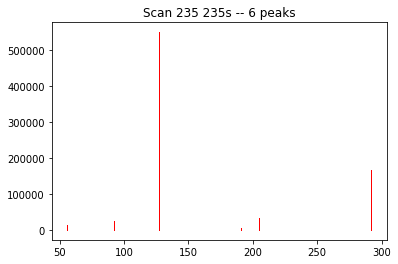

55.810832047021954 12327.288821037848
92.17629005526365 24169.45606116721
127.03254652630757 549248.5723425191
191.2349791319499 5914.686200827087
205.1742353793077 33699.50003199343
292.1512612376754 167752.87483270804



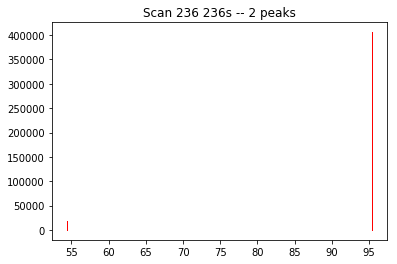

54.43737487247373 19275.20200400956
95.32980735672486 405929.1843439405



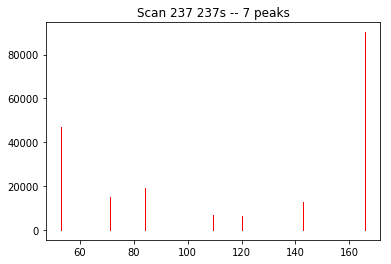

52.88581567883369 46888.51771952296
71.21084206127577 14923.000155322079
84.06310505498242 19042.793005647614
109.49084500880348 6611.867429784635
120.19101317994065 6260.743627021821
142.98932075909485 12627.959805070639
165.8914318239863 90209.1068119783

Scan 238 -- num_peaks=12 rt=238.00 ms_level=1
Excluded precursor ion 356.1977938846438 238 ExclusionItem(from_mz=356.196125700503, to_mz=356.19968767956993, from_rt=204, to_rt=264)
Excluded precursor ion 189.3220647075082 238 ExclusionItem(from_mz=189.32091140316246, to_mz=189.32280462174262, from_rt=204, to_rt=264)
Excluded precursor ion 97.92897359153604 238 ExclusionItem(from_mz=97.92847814654483, to_mz=97.92945743622276, from_rt=204, to_rt=264)
Isolated precursor ion 88.2093201127419 window [[(88.20887906614134, 88.20976115934248)]]
Excluded precursor ion 289.55476362240614 238 ExclusionItem(from_mz=289.5531274741281, to_mz=289.55602301988057, from_rt=194, to_rt=254)



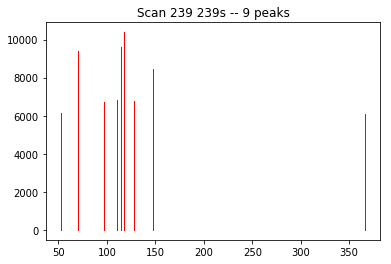

52.409337992354956 6150.147925254218
70.07401216677286 9397.125716657534
96.69020117334948 6697.930943994326
110.28612883014183 6823.3293525972085
114.30873455100225 9600.634515609772
117.53920942577562 10384.59113097932
127.72819168201106 6790.658539555762
147.61627367557955 8479.159838971565
366.49186316290354 6100.394519228164

Scan 240 -- num_peaks=12 rt=240.00 ms_level=1
Excluded precursor ion 356.1978389460467 240 ExclusionItem(from_mz=356.196125700503, to_mz=356.19968767956993, from_rt=204, to_rt=264)
Excluded precursor ion 189.32192802217384 240 ExclusionItem(from_mz=189.32091140316246, to_mz=189.32280462174262, from_rt=204, to_rt=264)
Excluded precursor ion 97.92886292208938 240 ExclusionItem(from_mz=97.92847814654483, to_mz=97.92945743622276, from_rt=204, to_rt=264)
Excluded precursor ion 88.20913277695583 240 ExclusionItem(from_mz=88.20887906614134, to_mz=88.20976115934248, from_rt=208, to_rt=268)
Isolated precursor ion 200.74108240687158 window [[(200.74007870145954, 200.74

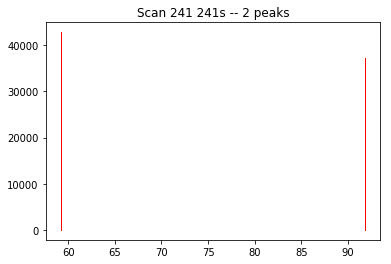

59.214941098072316 42798.28858479401
91.83539836991727 37255.75092716437

Scan 242 -- num_peaks=11 rt=242.00 ms_level=1
Excluded precursor ion 356.19791038351866 242 ExclusionItem(from_mz=356.196125700503, to_mz=356.19968767956993, from_rt=204, to_rt=264)
Isolated precursor ion 126.41969584165093 window [[(126.41906374317172, 126.42032794013015)]]
Excluded precursor ion 200.7405984992574 242 ExclusionItem(from_mz=200.74007870145954, to_mz=200.74208611228363, from_rt=210, to_rt=270)
Excluded precursor ion 88.20894421403777 242 ExclusionItem(from_mz=88.20887906614134, to_mz=88.20976115934248, from_rt=208, to_rt=268)
Excluded precursor ion 97.9292723682599 242 ExclusionItem(from_mz=97.92847814654483, to_mz=97.92945743622276, from_rt=204, to_rt=264)

Scan 244 -- num_peaks=12 rt=244.00 ms_level=1
Isolated precursor ion 126.42084016255461 window [[(126.4202080583538, 126.42147226675543)]]
Excluded precursor ion 200.7413278604502 244 ExclusionItem(from_mz=200.74007870145954, to_mz=200.7420861

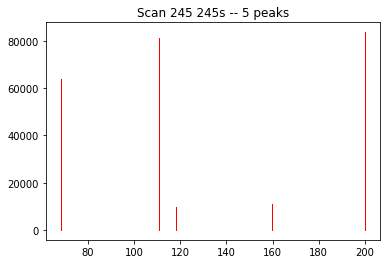

68.23200479845265 63871.20711694139
110.9149901529913 81086.78533049895
118.20615511140683 9633.162036204172
159.85193775227862 10889.399117346586
200.157615173464 83679.27490879473



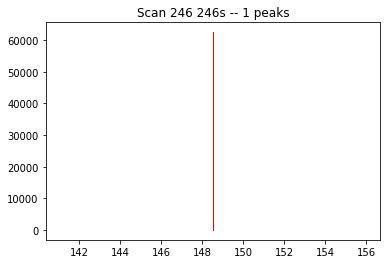

148.533019851917 62506.633589578014

Scan 248 -- num_peaks=9 rt=248.00 ms_level=1
Isolated precursor ion 134.84016966312916 window [[(134.83949546228084, 134.84084386397748)]]
Isolated precursor ion 150.4852273933523 window [[(150.4844749672153, 150.48597981948927)]]
Isolated precursor ion 123.17787372015094 window [[(123.17725783078234, 123.17848960951954)]]
Excluded precursor ion 169.14130165920915 248 ExclusionItem(from_mz=169.14048573340332, to_mz=169.14217714671773, from_rt=214, to_rt=274)
Excluded precursor ion 200.74105087755254 248 ExclusionItem(from_mz=200.74007870145954, to_mz=200.74208611228363, from_rt=210, to_rt=270)



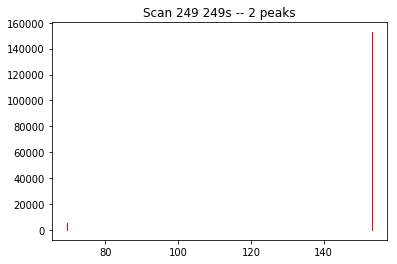

69.50465817265446 5190.392695728719
153.13014517103608 152637.18788628103



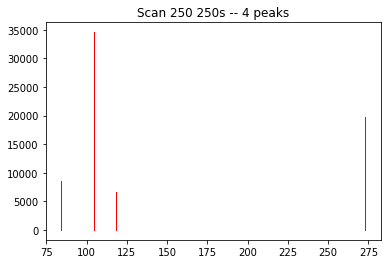

84.09337674304572 8541.897448490497
104.58440398952503 34584.652485246246
118.08391800352115 6719.746416558398
273.0723890817152 19737.750435596452



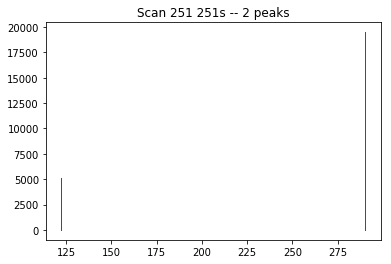

122.23492784703802 5094.724360023678
290.3751556602666 19480.844170422144

Scan 252 -- num_peaks=8 rt=252.00 ms_level=1
Excluded precursor ion 134.84011681334312 252 ExclusionItem(from_mz=134.83949546228084, to_mz=134.84084386397748, from_rt=218, to_rt=278)
Isolated precursor ion 191.65862263521768 window [[(191.6576643421045, 191.65958092833085)]]
Excluded precursor ion 150.4851564885909 252 ExclusionItem(from_mz=150.4844749672153, to_mz=150.48597981948927, from_rt=218, to_rt=278)
Isolated precursor ion 130.33235710949708 window [[(130.33170544771153, 130.33300877128264)]]
Excluded precursor ion 123.17779199241947 252 ExclusionItem(from_mz=123.17725783078234, to_mz=123.17848960951954, from_rt=218, to_rt=278)



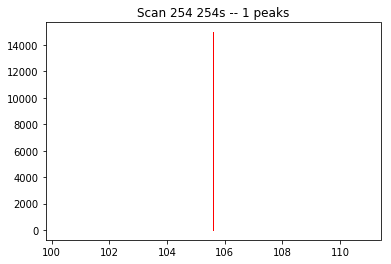

105.59870570024704 14973.105284924432

Scan 255 -- num_peaks=6 rt=255.00 ms_level=1
Excluded precursor ion 191.65853652981653 255 ExclusionItem(from_mz=191.6576643421045, to_mz=191.65958092833085, from_rt=222, to_rt=282)
Excluded precursor ion 134.8400978615721 255 ExclusionItem(from_mz=134.83949546228084, to_mz=134.84084386397748, from_rt=218, to_rt=278)
Isolated precursor ion 139.16757651858643 window [[(139.16688068070383, 139.16827235646903)]]
Excluded precursor ion 130.33223549703607 255 ExclusionItem(from_mz=130.33170544771153, to_mz=130.33300877128264, from_rt=222, to_rt=282)
Isolated precursor ion 390.9445031902401 window [[(390.9425484677241, 390.94645791275605)]]



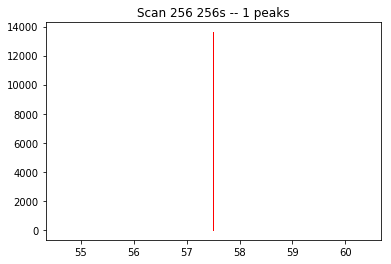

57.500073305171874 13604.955938187773



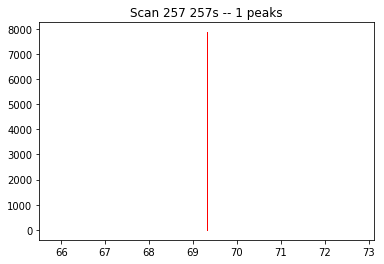

69.31547180625232 7860.927031488849

Scan 258 -- num_peaks=7 rt=258.00 ms_level=1
Isolated precursor ion 103.76689041400799 window [[(103.76637157955591, 103.76740924846007)]]
Isolated precursor ion 450.9480130186904 window [[(450.9457582786253, 450.9502677587555)]]
Isolated precursor ion 223.1592511678934 window [[(223.15813537163754, 223.16036696414923)]]
Excluded precursor ion 191.65874516360876 258 ExclusionItem(from_mz=191.6576643421045, to_mz=191.65958092833085, from_rt=222, to_rt=282)
Excluded precursor ion 139.16761297013792 258 ExclusionItem(from_mz=139.16688068070383, to_mz=139.16827235646903, from_rt=225, to_rt=285)



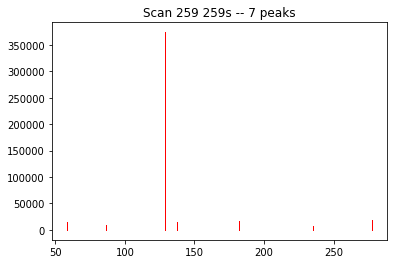

58.534150988779516 14726.253608310517
86.7695091327195 8433.250933607398
129.18773581890852 373901.94737179286
137.7617482062691 15292.223846139037
181.85079037989166 17075.558368218946
235.2951900281247 7202.942806720258
277.2619174974359 18735.646947642264



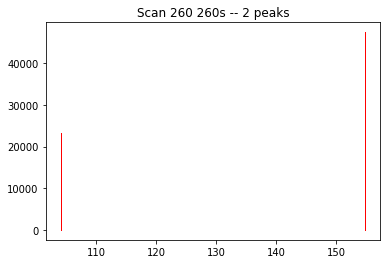

104.1344978935197 23258.119186950924
154.86074866110684 47463.166065057936



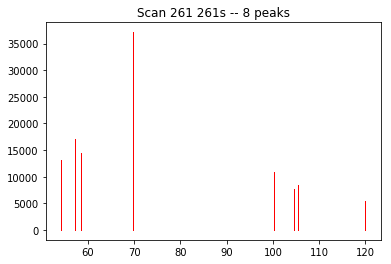

54.181032710215185 13169.06280707038
57.29951124979983 17077.465427529845
58.54833286749104 14385.862428525466
69.86170336597921 37127.02053376802
100.16308343469075 10856.523096688808
104.46183977738407 7673.669949900838
105.46780839086982 8506.380430412768
119.97148801699717 5434.303037519097

Scan 262 -- num_peaks=8 rt=262.00 ms_level=1
Isolated precursor ion 160.20207301328966 window [[(160.20127200292458, 160.20287402365474)]]
Excluded precursor ion 103.76683619540073 262 ExclusionItem(from_mz=103.76637157955591, to_mz=103.76740924846007, from_rt=228, to_rt=288)
Excluded precursor ion 223.15927043796236 262 ExclusionItem(from_mz=223.15813537163754, to_mz=223.16036696414923, from_rt=228, to_rt=288)
Isolated precursor ion 224.30550667434807 window [[(224.3043851468147, 224.30662820188144)]]
Excluded precursor ion 450.94824865206544 262 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)



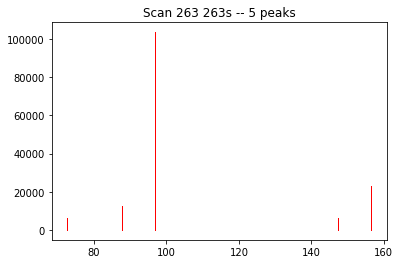

72.56454660265474 6409.7348267333855
87.78953867446594 12445.333102283452
96.97094478010459 103580.0752458193
147.4015705254632 6348.443192330472
156.58443273237327 22914.525102362666



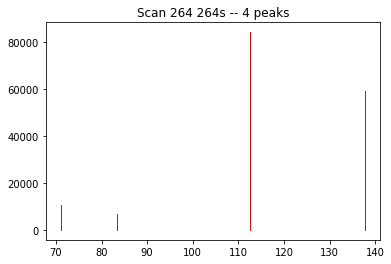

71.06880561927287 10710.318816716626
83.41855925966611 6909.770673630997
112.48256102730035 84258.97906909548
137.7789073053558 59198.18285466139

Scan 265 -- num_peaks=9 rt=265.00 ms_level=1
Isolated precursor ion 187.88094607975185 window [[(187.88000667502143, 187.88188548448227)]]
Excluded precursor ion 224.30567556906072 265 ExclusionItem(from_mz=224.3043851468147, to_mz=224.30662820188144, from_rt=232, to_rt=292)
Excluded precursor ion 223.1593197419768 265 ExclusionItem(from_mz=223.15813537163754, to_mz=223.16036696414923, from_rt=228, to_rt=288)
Excluded precursor ion 103.76690093410144 265 ExclusionItem(from_mz=103.76637157955591, to_mz=103.76740924846007, from_rt=228, to_rt=288)
Excluded precursor ion 450.9481089677469 265 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)



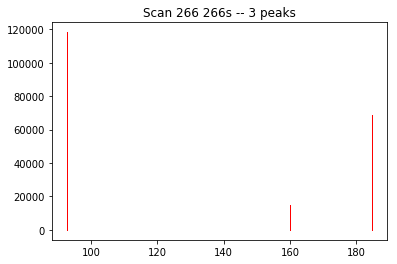

92.79969483696632 118253.63739098638
160.06405392546722 14911.225865799499
184.6359931872821 68711.89437447776

Scan 267 -- num_peaks=10 rt=267.00 ms_level=1
Excluded precursor ion 187.88085048667924 267 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Excluded precursor ion 224.30573881250058 267 ExclusionItem(from_mz=224.3043851468147, to_mz=224.30662820188144, from_rt=232, to_rt=292)
Excluded precursor ion 450.9480694207807 267 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)
Isolated precursor ion 124.00141881522883 window [[(124.00079880813475, 124.00203882232292)]]
Isolated precursor ion 105.6562528265083 window [[(105.65572454524415, 105.65678110777243)]]



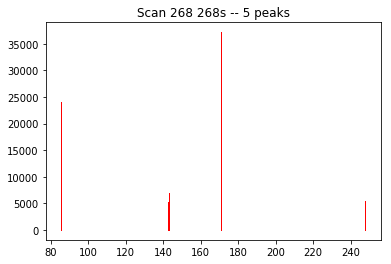

85.5455662171598 24008.081501759018
142.4405415467152 5290.988056170449
143.1958674204713 7016.381546405621
170.8550652314518 37177.99174278638
247.84558790071995 5389.72914393094



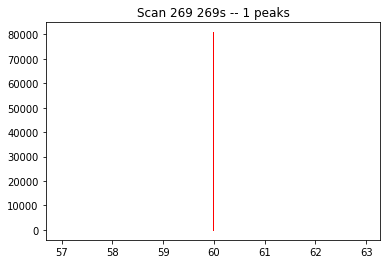

59.98028174753812 80857.12989909381

Scan 270 -- num_peaks=9 rt=270.00 ms_level=1
Excluded precursor ion 187.88086681564468 270 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Excluded precursor ion 224.3055855561797 270 ExclusionItem(from_mz=224.3043851468147, to_mz=224.30662820188144, from_rt=232, to_rt=292)
Isolated precursor ion 114.54884868758215 window [[(114.54827594333871, 114.54942143182559)]]
Excluded precursor ion 450.94821642301315 270 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)
Excluded precursor ion 124.00146092500775 270 ExclusionItem(from_mz=124.00079880813475, to_mz=124.00203882232292, from_rt=237, to_rt=297)

Scan 272 -- num_peaks=11 rt=272.00 ms_level=1
Excluded precursor ion 187.8809690441944 272 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Excluded precursor ion 114.54898906203479 272 ExclusionItem(from_mz=114.54827594333871, to_m

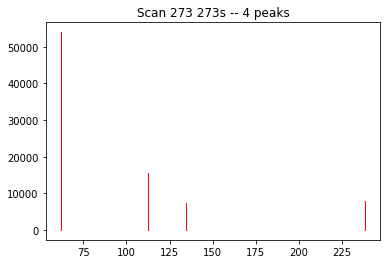

61.97445619255046 54002.75663406426
112.59665428619876 15614.893585925973
134.3136110347526 7263.232071272513
238.43159327682082 7907.764011931116

Scan 274 -- num_peaks=12 rt=274.00 ms_level=1
Excluded precursor ion 187.88080250237448 274 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Excluded precursor ion 450.94814684978434 274 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)
Excluded precursor ion 168.84149164943312 274 ExclusionItem(from_mz=168.84055172050165, to_mz=168.84224013446095, from_rt=242, to_rt=302)
Excluded precursor ion 114.54852595680896 274 ExclusionItem(from_mz=114.54827594333871, to_mz=114.54942143182559, from_rt=240, to_rt=300)
Isolated precursor ion 232.79211442156088 window [[(232.79095046098877, 232.793278382133)]]



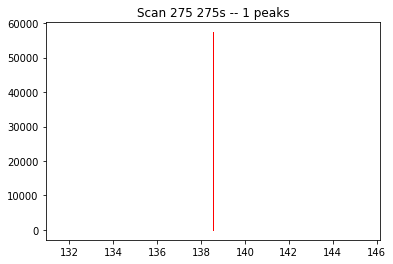

138.54825394379958 57373.18853686949

Scan 276 -- num_peaks=12 rt=276.00 ms_level=1
Excluded precursor ion 187.88088976368417 276 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Isolated precursor ion 286.42311489103577 window [[(286.4216827754613, 286.4245470066102)]]
Isolated precursor ion 178.62184044741454 window [[(178.6209473382123, 178.6227335566168)]]
Excluded precursor ion 168.84147582557225 276 ExclusionItem(from_mz=168.84055172050165, to_mz=168.84224013446095, from_rt=242, to_rt=302)
Excluded precursor ion 450.9481858964755 276 ExclusionItem(from_mz=450.9457582786253, to_mz=450.9502677587555, from_rt=228, to_rt=288)



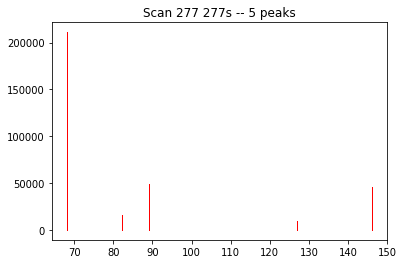

68.23158506775815 210996.1694341828
82.14540143603863 16269.702390039452
89.01466675923115 49147.56285518972
126.8612587963531 9177.129265126716
145.99959073453203 45744.31117983848



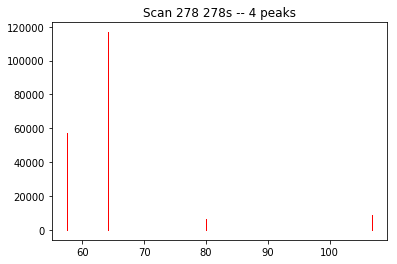

57.52009588996344 57117.30787789386
64.0988428156362 116747.50518337799
80.02809375243604 6614.73874446427
106.78802662861035 8560.498943074213

Scan 279 -- num_peaks=14 rt=279.00 ms_level=1
Isolated precursor ion 130.644326086192 window [[(130.64367286456155, 130.64497930782244)]]
Excluded precursor ion 286.4230918899277 279 ExclusionItem(from_mz=286.4216827754613, to_mz=286.4245470066102, from_rt=246, to_rt=306)
Excluded precursor ion 187.880911708997 279 ExclusionItem(from_mz=187.88000667502143, to_mz=187.88188548448227, from_rt=235, to_rt=295)
Excluded precursor ion 178.62175113093178 279 ExclusionItem(from_mz=178.6209473382123, to_mz=178.6227335566168, from_rt=246, to_rt=306)
Isolated precursor ion 178.40290479852806 window [[(178.40201278400406, 178.40379681305205)]]



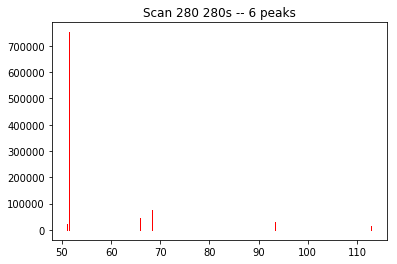

51.0445305752568 21281.379117101755
51.444114286350164 751660.1481208068
65.812176226467 43816.25787845076
68.40615622312859 75978.8500138235
93.32704862102437 29903.185595172028
112.94439137357523 16018.13689397577



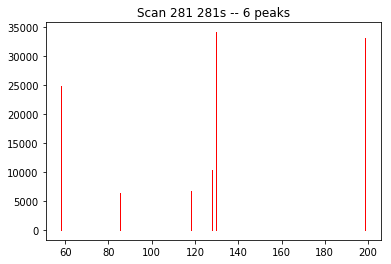

58.05799323797282 24824.81632847562
85.43081841787547 6385.068577521768
118.00826937888253 6712.1759799396805
127.9478200812017 10410.708193489067
129.54372809295256 34120.13911453929
198.71328661679598 33128.994280958184

Scan 282 -- num_peaks=17 rt=282.00 ms_level=1
Excluded precursor ion 130.6443403994534 282 ExclusionItem(from_mz=130.64367286456155, to_mz=130.64497930782244, from_rt=249, to_rt=309)
Isolated precursor ion 360.15735058311503 window [[(360.1555497963621, 360.15915136986797)]]
Excluded precursor ion 178.6216835861517 282 ExclusionItem(from_mz=178.6209473382123, to_mz=178.6227335566168, from_rt=246, to_rt=306)
Isolated precursor ion 88.24682214440566 window [[(88.24638091029493, 88.24726337851638)]]
Isolated precursor ion 204.69371277308386 window [[(204.69268930452, 204.69473624164772)]]



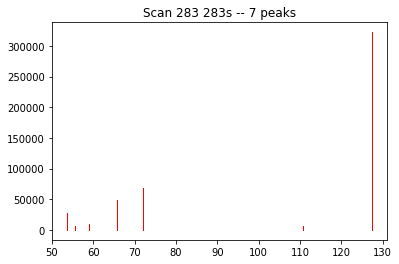

53.67242544608526 27914.2064352872
55.62524360926085 5854.63027373633
58.98658719830646 10370.04847342465
65.60267511614616 49135.944089568795
72.04250636183843 68499.86886158792
110.68715387446491 6893.669718552215
127.27684692313925 322376.21229337173



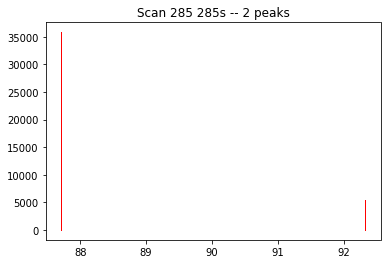

87.70745513161168 35847.76516207656
92.3243685189075 5472.032740432834

Scan 286 -- num_peaks=18 rt=286.00 ms_level=1
Isolated precursor ion 234.27073734346507 window [[(234.26956598977836, 234.2719086971518)]]
Excluded precursor ion 130.6442049347619 286 ExclusionItem(from_mz=130.64367286456155, to_mz=130.64497930782244, from_rt=249, to_rt=309)
Excluded precursor ion 360.1570032507063 286 ExclusionItem(from_mz=360.1555497963621, to_mz=360.15915136986797, from_rt=252, to_rt=312)
Isolated precursor ion 158.49264414846087 window [[(158.49185168524014, 158.4934366116816)]]
Excluded precursor ion 178.62170671697254 286 ExclusionItem(from_mz=178.6209473382123, to_mz=178.6227335566168, from_rt=246, to_rt=306)



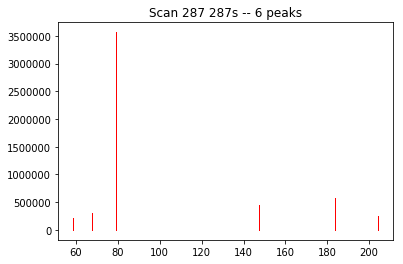

58.7424160520446 207996.10233098263
67.58545032989073 310629.80694050237
79.1222505367387 3565041.328147223
147.4339945938732 454226.36400164076
183.55772962303797 584246.8334067984
204.14752062227302 258584.4298137133



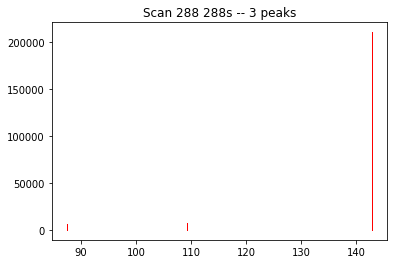

87.54108876271289 5838.4918595510435
109.33193433621292 7142.071821905681
142.76873336117853 210262.26007683593

Scan 289 -- num_peaks=17 rt=289.00 ms_level=1
Isolated precursor ion 234.26920600030516 window [[(234.26803465427514, 234.27037734633518)]]
Isolated precursor ion 205.88102152898037 window [[(205.8799921238727, 205.88205093408803)]]
Excluded precursor ion 360.15720281004667 289 ExclusionItem(from_mz=360.1555497963621, to_mz=360.15915136986797, from_rt=252, to_rt=312)
Excluded precursor ion 178.62176662778654 289 ExclusionItem(from_mz=178.6209473382123, to_mz=178.6227335566168, from_rt=246, to_rt=306)
Isolated precursor ion 303.67809763269383 window [[(303.67657924220566, 303.679616023182)]]



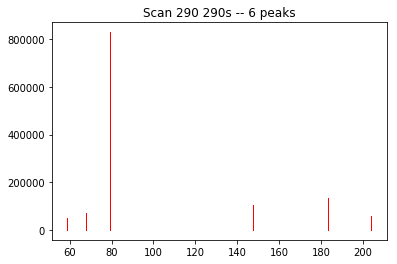

58.7424160520446 48360.56749073362
67.58545032989073 72223.63099513737
79.1222505367387 828897.3679072495
147.4339945938732 105610.84792548916
183.55772962303797 135841.5282862161
204.14752062227302 60122.712060052836



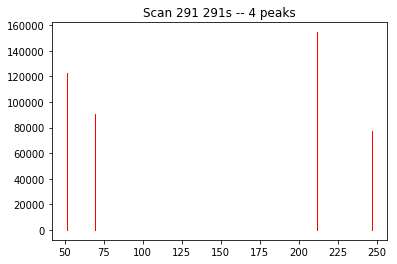

51.57635666087184 122638.96121780683
69.34732946767551 90304.72151713927
211.46882762461627 154408.09516491558
246.74093212930345 77013.52339321755



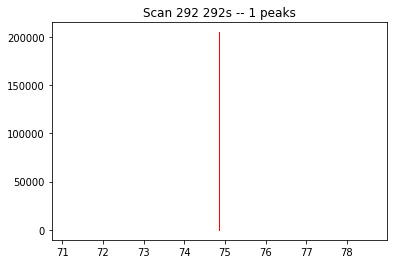

74.86143238048004 204807.71718172648

Scan 293 -- num_peaks=17 rt=293.00 ms_level=1
Isolated precursor ion 390.11872145020874 window [[(390.1167708566015, 390.120672043816)]]
Excluded precursor ion 205.88140504358424 293 ExclusionItem(from_mz=205.8799921238727, to_mz=205.88205093408803, from_rt=259, to_rt=319)
Isolated precursor ion 135.69992277416284 window [[(135.69924427454896, 135.70060127377673)]]
Excluded precursor ion 178.62166929654626 293 ExclusionItem(from_mz=178.6209473382123, to_mz=178.6227335566168, from_rt=246, to_rt=306)
Excluded precursor ion 303.67812815027185 293 ExclusionItem(from_mz=303.67657924220566, to_mz=303.679616023182, from_rt=259, to_rt=319)



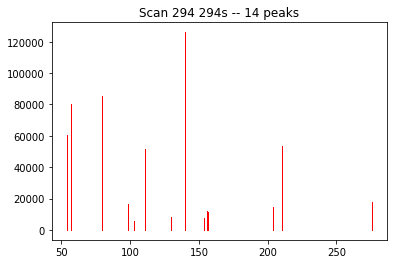

54.12728649478679 60321.175465978304
56.603038257820415 80387.49922149084
79.34652181156412 85626.83080146104
98.06040874761284 16778.511736005876
102.89079014710572 5457.556318093143
110.42952617742604 51421.84212430155
129.89573450953012 8454.71442662565
139.8157925421943 126009.067271353
153.8775125731156 7700.473481582219
155.93773042275714 11992.744967611854
156.62650358411813 11565.177493597072
204.20409205855935 14790.963433449353
210.68739826271712 53462.07343762318
275.5550497104014 17722.066030051934



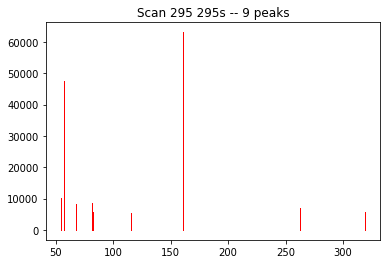

54.47777437859229 10119.5531705696
57.52702317809776 47567.323446437134
67.97822053321597 8232.17989020706
81.87054005938224 8496.798266630736
82.65390484022133 5708.204864073481
115.85058176007304 5375.681521334707
160.62177134753642 63101.02303618532
262.55078194260676 7081.531031504941
319.29649950100605 5594.056006005515

Scan 296 -- num_peaks=14 rt=296.00 ms_level=1
Excluded precursor ion 390.11877093171165 296 ExclusionItem(from_mz=390.1167708566015, to_mz=390.120672043816, from_rt=263, to_rt=323)
Excluded precursor ion 205.88135006673645 296 ExclusionItem(from_mz=205.8799921238727, to_mz=205.88205093408803, from_rt=259, to_rt=319)
Excluded precursor ion 135.69952940269872 296 ExclusionItem(from_mz=135.69924427454896, to_mz=135.70060127377673, from_rt=263, to_rt=323)
Isolated precursor ion 127.32620368395153 window [[(127.32556705293311, 127.32684031496996)]]
Isolated precursor ion 120.47981412324233 window [[(120.47921172417172, 120.48041652231295)]]



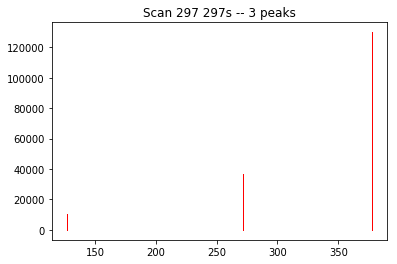

127.13479439936371 10204.093263214207
271.57657589144367 36713.473657351184
377.2835306357411 129913.34076623044

Scan 299 -- num_peaks=10 rt=299.00 ms_level=1
Excluded precursor ion 127.32594532051125 299 ExclusionItem(from_mz=127.32556705293311, to_mz=127.32684031496996, from_rt=266, to_rt=326)
Isolated precursor ion 207.8030972913737 window [[(207.80205827588722, 207.80413630686016)]]
Excluded precursor ion 135.6996583378436 299 ExclusionItem(from_mz=135.69924427454896, to_mz=135.70060127377673, from_rt=263, to_rt=323)
Excluded precursor ion 120.47930815044411 299 ExclusionItem(from_mz=120.47921172417172, to_mz=120.48041652231295, from_rt=266, to_rt=326)
Isolated precursor ion 123.4376311218657 window [[(123.43701393371009, 123.43824831002132)]]

Acquisition closing


In [12]:
max_rt = 300                    # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 30                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

mass_spec = IndependentMassSpectrometer(POSITIVE, sampled_chemicals)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.run(max_rt)

In [23]:
controller.write_mzML('my_analysis', '../models/out.mzML')